# Problem: To find the better Classification Algorithm between Logistic Regression and Naive Bayes.

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso,RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [156]:
data = pd.read_csv('diabetes.csv') # Reading the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [157]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [158]:
data.shape

(768, 9)

There are no null values, which is good.
But there can be seen many Zero values, that can be removed or we can deal with the respective Means:
    

In [159]:
# Replacing Zero values with the Mean of the column:

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Pregnancies'] = data['Pregnancies'].replace(0,data['Pregnancies'].mean())

C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

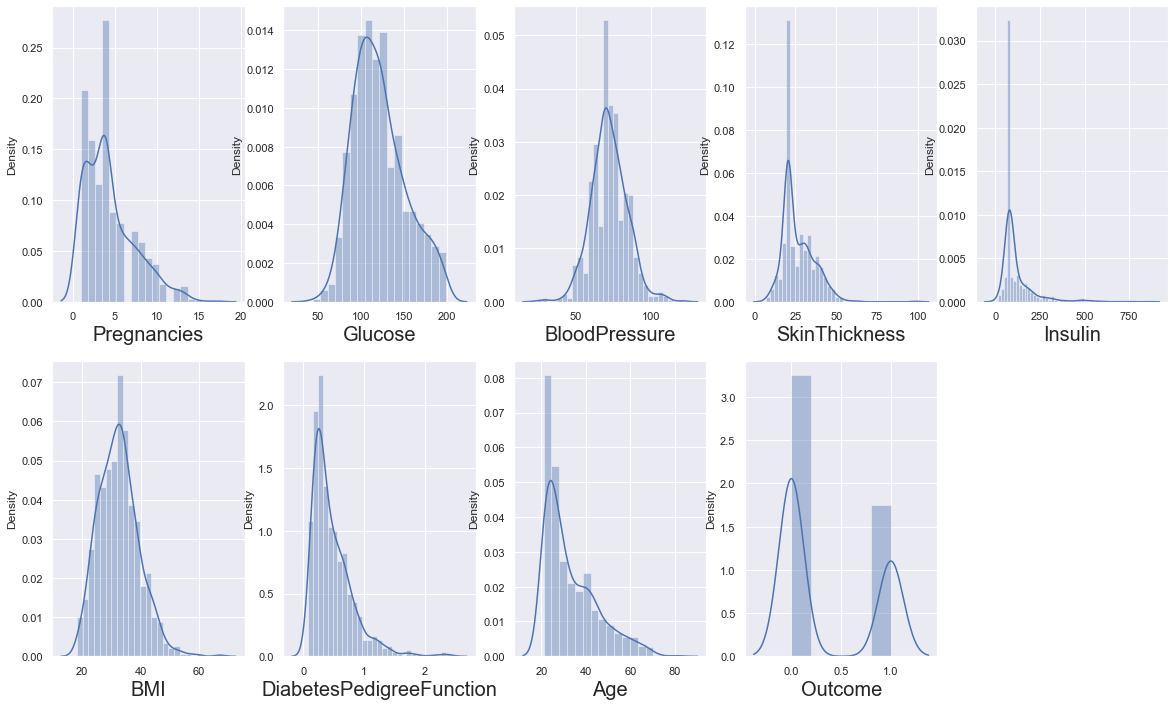

In [160]:
# Checking the Data Distribution:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1

plt.show()

##### We can see huge outliers, lets deal with them:

In [161]:
# Handling the Outliers:

q = data['Pregnancies'].quantile(0.98)
# Removing top 2% data from Pregnancies
data_cleaned = data[data['Pregnancies']<q]

q = data['BMI'].quantile(0.99)
# Removing top 1% data from BMI
data_cleaned = data[data['BMI']<q]

q = data['DiabetesPedigreeFunction'].quantile(0.99)
# Removing top 1% data from Pregnancies
data_cleaned = data[data['DiabetesPedigreeFunction']<q]

q = data['BloodPressure'].quantile(0.97)
# Removing top 3% data from BloodPressure
data_cleaned = data[data['BloodPressure']<q]

q = data['Age'].quantile(0.96)
# Removing top 4% data from Age
data_cleaned = data[data['Age']<q]

q = data['SkinThickness'].quantile(0.99)
# Removing top 1% data from SkinThickness
data_cleaned = data[data['SkinThickness']<q]

q = data['Insulin'].quantile(0.94)
# Removing top 6% data from Insulin
data_cleaned = data[data['Insulin']<q]

In [162]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salman\anacondaUpdated\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

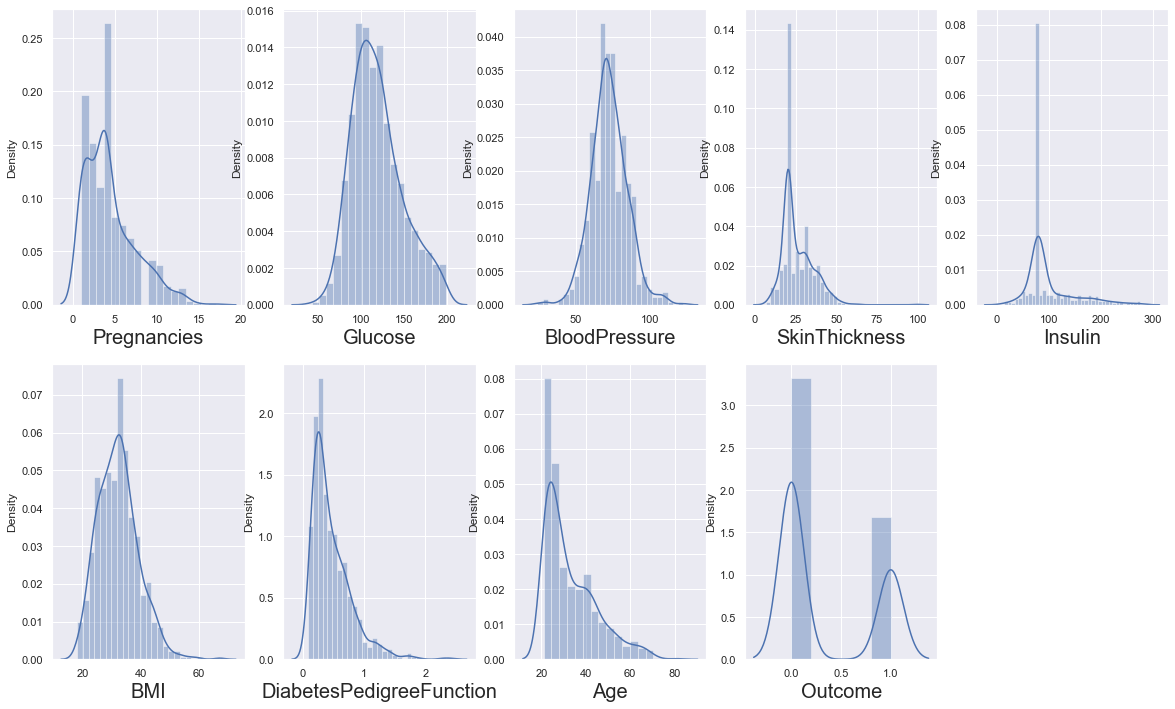

In [163]:
# Checking the Data Distribution again after reoving Outrliers::
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber <= 9:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1

plt.show()

In [164]:
# Dividing the data into X and Y
X = data.drop(columns=['Outcome'])
Y = data['Outcome']

In [165]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [166]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [167]:
# Scaling the Data:

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [168]:
# X Data after Scaling:
X_Scaled

array([[ 0.5362511 ,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-1.1403533 , -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.20689286,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.20093022, -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-1.1403533 , -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [169]:
# Checking Multi Colinearity using VIF:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_Scaled,i) for i in range(X_Scaled.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.410013,Pregnancies
1,1.347415,Glucose
2,1.252549,BloodPressure
3,1.450493,SkinThickness
4,1.264171,Insulin
5,1.559203,BMI
6,1.056273,DiabetesPedigreeFunction
7,1.546208,Age


No Multicollinearity as all the VIFs are very low (less than 5).

#### Split the data into test and train before fitting the model:

In [170]:
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size=0.25, random_state=355)

In [171]:
from sklearn.naive_bayes import GaussianNB # For continous Data
model = GaussianNB()

In [172]:
model.fit(x_train,y_train)

GaussianNB()

In [173]:
y_pred = model.predict(x_test)

In [174]:
accuracy_score(y_test,y_pred)

0.7916666666666666

In [175]:
# Confusion Matrix:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 25,  42]], dtype=int64)

In [176]:
true_pos = conf_mat[0][0]
false_pos = conf_mat[0][1]
false_neg = conf_mat[1][0] # The severe result
true_neg = conf_mat[1][1]

In [177]:
# Breaking down the formula for accuracy:
Accuracy = (true_pos + true_neg) / (true_pos + false_pos + false_neg + true_neg)
Accuracy

0.7916666666666666

In [178]:
# Precision:
Precision = true_pos / (true_pos + false_pos) # How many True Positive we able to find
Precision

0.88

In [179]:
# Recall:
Recall = true_pos / (true_pos + false_neg)
Recall

0.8148148148148148

In [180]:
# F1 Score:
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
F1_Score

0.8461538461538461

In [181]:
# Area Under Curve:

auc = roc_auc_score(y_test, y_pred)
auc

0.7534328358208955

In [182]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)

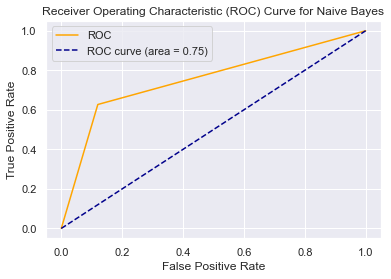

In [183]:
plt.plot(fpr,tpr, color='orange', label = 'ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [184]:
# Implementing same thing with LOGISTIC REGRESSION to compare:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [185]:
y_pred_logistic = log_reg.predict(x_test)

In [186]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic

0.7447916666666666

In [187]:
conf_mat = confusion_matrix(y_test, y_pred_logistic)
conf_mat

array([[108,  17],
       [ 32,  35]], dtype=int64)

In [188]:
# ROC:
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(y_test, y_pred_logistic)

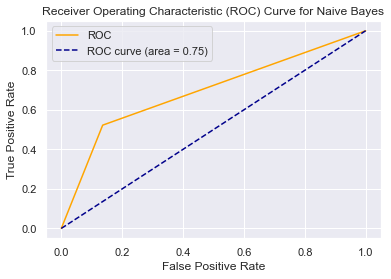

In [189]:
plt.plot(fpr_logistic,tpr_logistic, color='orange', label = 'ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [190]:
auc_logistic = roc_auc_score(y_test, y_pred_logistic)
print('Logistic Regression: ', auc_logistic)

Logistic Regression:  0.6931940298507463


In [191]:
auc_naive = roc_auc_score(y_test, y_pred)
print('Naive Bayes Accuracy: ', auc_naive)

Naive Bayes Accuracy:  0.7534328358208955


# Conclusion:

### The Accuracy of Naive Bayes Algorithm is better to use in this Classification Problem.